<a href="https://colab.research.google.com/github/hauduong05/ML_basics/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz

In [27]:
tn = pd.read_csv('tennis.csv')

tn.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [29]:
str2label = LabelEncoder()
df = tn.apply(str2label.fit_transform)

df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [33]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
print(tree.score(X, y))

0.8571428571428571


In [37]:
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns,
                class_names=['True', 'False'], impurity=False, filled=True)

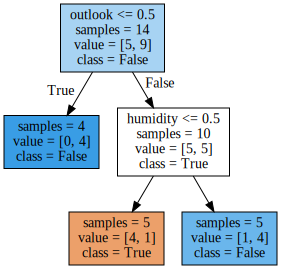

In [38]:
with open('tree.dot') as f:
  graph = f.read()

graphviz.Source(graph)